In [1]:
# Question Type Numbers in Evaluation Set:
#{'color_room': 1335, 'color': 345, 'location': 270} total = 1950
# validation answer vocab: 35 words (including unk)
total_color_room = 1335
total_color = 345
total_location = 270
total_questions = 1950
validation_answer_vocab = 35

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
training_ans_dist = {'brown': 2352,
'white':            2143,
'silver':           1110,
'black':            1031,
'off-white':         855,
'tan':               825,
'kitchen':           600,
'grey':              525,
'green':             255,
'blue':              240,
'bedroom':           225,
'living room':       165,
'bathroom':          150,
'slate grey':        135,
'olive green':       105,
'laundry room':      105,
'family room':        75,
'closet':             75,
'lounge':             60,
'red':                60,
'yellow green':       45,
'purple':             45,
'spa':                45,
'light blue':         30,
'office':             30,
'hallway':            30,
'purple pink':        30,
'dining room':        30,
'red brown':          30,
'tv room':            30,
'orange yellow':      15,
'foyer':              15,
'yellow':             15,
'yellow pink':        15}

In [4]:
import json
from collections import Counter


#Validation Set
with open('/home/yasmeen/Desktop/val.json') as json_file:
    val = json.load(json_file)
episodes = val['episodes']

In [26]:
for item in episodes:
    print(item['episode_id'])
print(len(episodes))

1
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
20
24
27
31
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
2

In [5]:
ans = pd.DataFrame()
print(len(episodes))
for item in episodes:
    ans = ans.append({'episode_id': int(item['episode_id']), 'answer': item['question']['answer_text']}, ignore_index=True)
    
print(ans)

1950
           answer  episode_id
0           brown         1.0
1           brown         3.0
2           brown         4.0
3           brown         5.0
4           brown         6.0
...           ...         ...
1945      bedroom      2020.0
1946  family room      2021.0
1947  family room      2022.0
1948      bedroom      2023.0
1949      bedroom      2024.0

[1950 rows x 2 columns]


In [16]:
def constr_answers(file):
    wrong_ans = pd.DataFrame()
    for index, row in file.iterrows():
        wrong_ans = wrong_ans.append({'episode_id': int(row['episode_id']), 'answer': row['prediction']}, ignore_index = True)
    print(wrong_ans.sort_values(by=['episode_id']))
    print(ans)    
    df = wrong_ans[wrong_ans['episode_id'].isin(ans['episode_id']) == False]
    print(len(df))


In [17]:
def percent_right(file):
    counts = file['question_type'].value_counts()
    total_wrong = len(file.index)
    rights = np.empty([4])
    rights[0] = (total_questions - total_wrong) / total_questions
    rights[1] = (total_color_room - counts['color_room'])/total_color_room
    rights[2] = (total_color - counts['color'])/total_color
    rights[3] = (total_location - counts['location'])/total_location
    return rights

def agreement_to_gt(rights):
    agreement = np.empty(4)
    p_e = 1 / validation_answer_vocab
    
    agreement[0] = (rights[0] - p_e)/(1-p_e)
    agreement[1] = (rights[1] - p_e)/(1-p_e)
    agreement[2] = (rights[2] - p_e)/(1-p_e)
    agreement[3] = (rights[3] - p_e)/(1-p_e)
    return agreement

In [23]:
wrong_file = pd.read_csv("/home/yasmeen/Desktop/wrong_answers/wrong_answers_boosted/wrong_answers0.csv")

#wrong_file['prediction']
wrong_file['ground truth']

0        white
1        white
2        white
3        white
4        white
         ...  
1465    silver
1466    silver
1467     white
1468    silver
1469    silver
Name: ground truth, Length: 1470, dtype: object

In [24]:
constr_answers(wrong_file)

     answer  episode_id
39    brown        13.0
3     brown        19.0
131   brown        21.0
14    brown        24.0
68    brown        27.0
...     ...         ...
939   brown      1945.0
1124  brown      1946.0
1428  brown      1947.0
1171  brown      1948.0
983   brown      1949.0

[1470 rows x 2 columns]
           answer  episode_id
0           brown         1.0
1           brown         3.0
2           brown         4.0
3           brown         5.0
4           brown         6.0
...           ...         ...
1945      bedroom      2020.0
1946  family room      2021.0
1947  family room      2022.0
1948      bedroom      2023.0
1949      bedroom      2024.0

[1950 rows x 2 columns]
57


In [10]:
print(ans.loc[ans['episode_id'] == 41])

   answer  episode_id
26  white        41.0


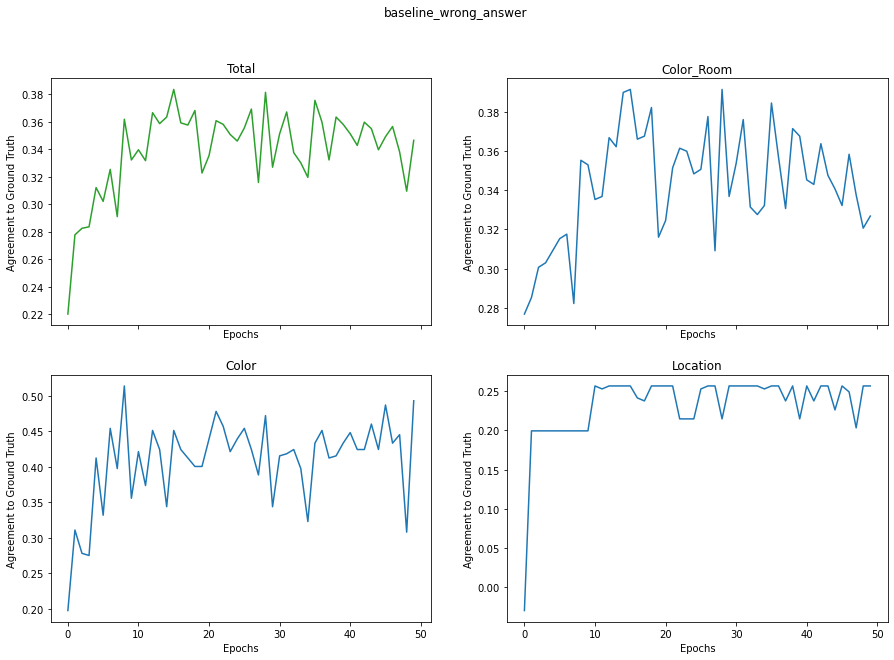

15
[0.38340875 0.39160608 0.45098039 0.25653595]


In [11]:
def produce_agreement_stats(experiment):
    agreement_list = []
    for c in range(0, 50):
        wrong_file = pd.read_csv("/home/yasmeen/Desktop/wrong_answers/{}/wrong_answers{}.csv".format(experiment, c))
        agreement_list.append(agreement_to_gt(percent_right(wrong_file)))
    agreement = np.stack(agreement_list)
    fig, axs = plt.subplots(2, 2, sharex=True)
    fig.set_size_inches(15, 10, forward=True)
    axs[0,0].plot(agreement[:,0], 'tab:green')
    axs[0, 0].set_title('Total')
    axs[0, 0].set_xlabel('Epochs')
    axs[0, 0].set_ylabel('Agreement to Ground Truth')
    axs[0,1].plot(agreement[:,1])
    axs[0, 1].set_xlabel('Epochs')
    axs[0, 1].set_ylabel('Agreement to Ground Truth')

    axs[0, 1].set_title('Color_Room')
    axs[1,0].plot(agreement[:,2])
    axs[1, 0].set_title('Color')
    axs[1, 0].set_xlabel('Epochs')
    axs[1, 0].set_ylabel('Agreement to Ground Truth')
    axs[1,1].plot(agreement[:,3])
    axs[1, 1].set_title('Location')
    axs[1, 1].set_xlabel('Epochs')
    axs[1, 1].set_ylabel('Agreement to Ground Truth')

    fig.suptitle(experiment)
    best_total_index = np.argmax(agreement, axis=0)[0]
    
    
    figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/wrong_answers/{}'.format(experiment)
    plt.savefig(figure_path)
    plt.show()

    print(best_total_index)
    print(agreement[best_total_index])

    #return agreement
produce_agreement_stats('baseline_wrong_answer')

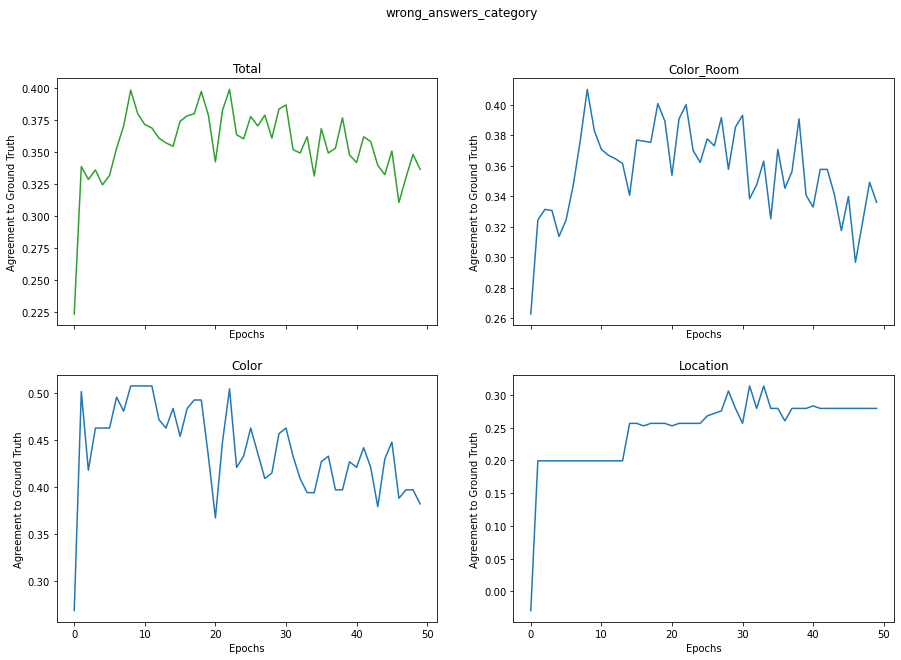

22
[0.39871795 0.40008813 0.50468883 0.25653595]


In [12]:
produce_agreement_stats('wrong_answers_category')

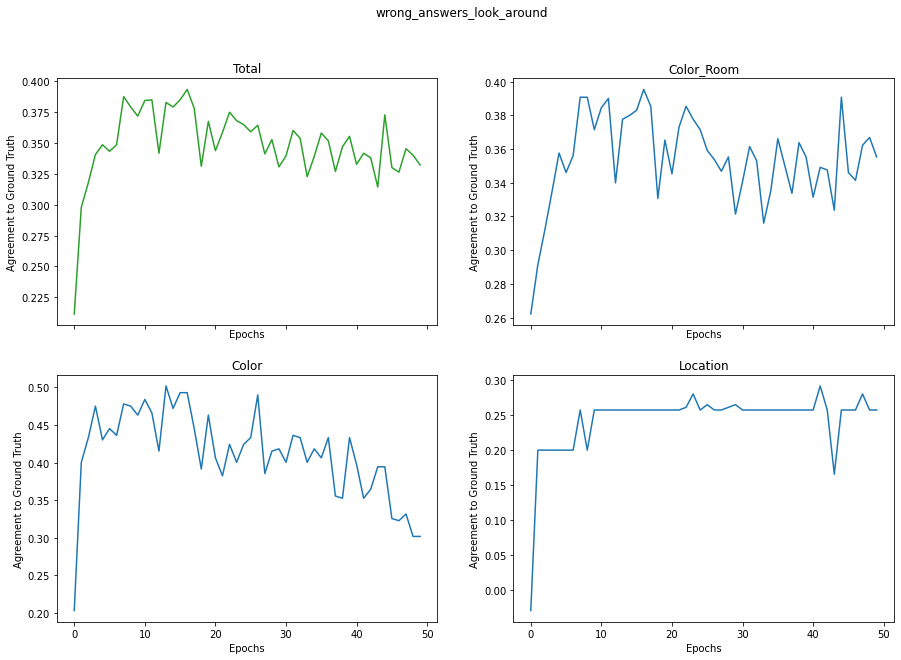

16
[0.39343891 0.39546156 0.49275362 0.25653595]


In [13]:
produce_agreement_stats('wrong_answers_look_around')

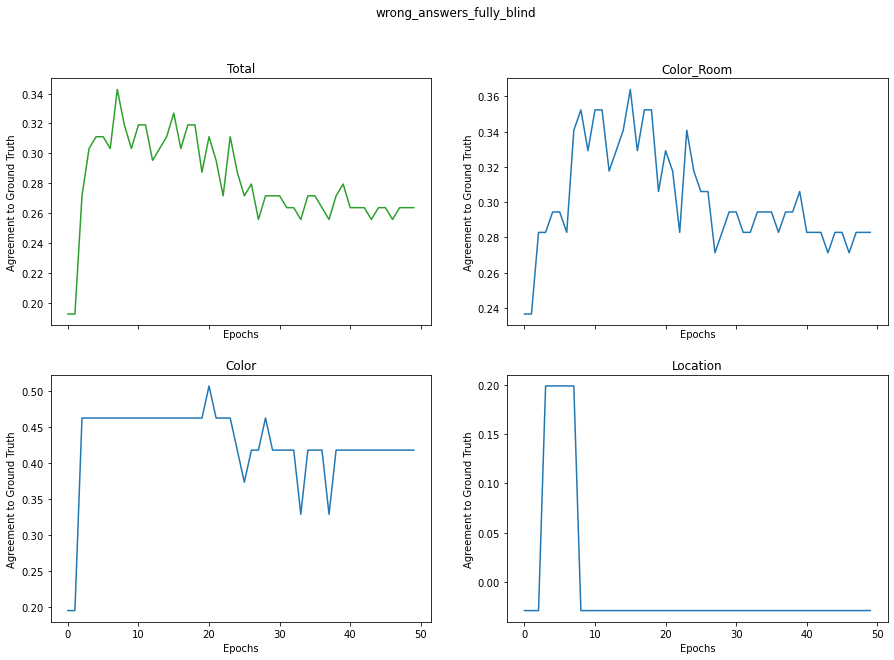

7
[0.34276018 0.34071381 0.4629156  0.19934641]


In [14]:
produce_agreement_stats('wrong_answers_fully_blind')

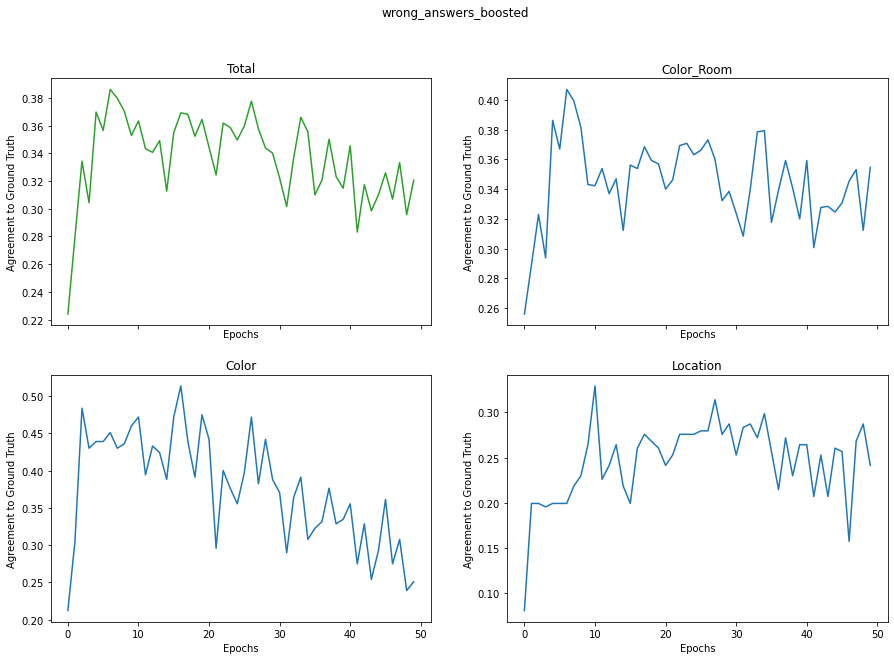

6
[0.38604827 0.40702798 0.45098039 0.19934641]


In [15]:
produce_agreement_stats('wrong_answers_boosted')